## 1)Dataset selection

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df=pd.read_csv("athlete_events.csv")
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [100]:
df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [101]:
df.shape              #271116 rows, 15 columns

(271116, 15)

In [102]:
df.count()

ID        271116
Name      271116
Sex       271116
Age       261642
Height    210945
Weight    208241
Team      271116
NOC       271116
Games     271116
Year      271116
Season    271116
City      271116
Sport     271116
Event     271116
Medal      39783
dtype: int64

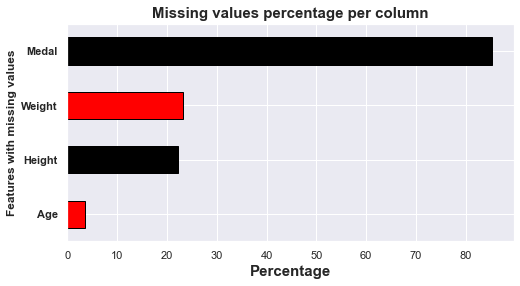

In [103]:
allna = (df.isnull().sum() / len(df))*100
allna = allna.drop(allna[allna == 0].index).sort_values()
plt.figure(figsize=(8, 4))
allna.plot.barh(color=('red', 'black'), edgecolor='black')
plt.title('Missing values percentage per column', fontsize=15, weight='bold' )
plt.xlabel('Percentage', weight='bold', size=15)
plt.ylabel('Features with missing values', weight='bold')
plt.yticks(weight='bold')
plt.show()

In [104]:
## as NaN values in medal column is actually signifing no medal won, 
## so effectively only Age , Height and weight columns have Null value to be handled

In [105]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [106]:
9474+60171+62875

132520

In [107]:
13250/(27116*15)*100

3.257609283571815

## 2)Dataset description

### Age - discrete ; 
### Sex - categorical, nominal (binary);
### Height - continous
### Weight - continous
### Teams - categorical (nominal)
### Year - discrete
### Season - binary categorical
### City - categorical
### Sport & Event - categorical 
### medal - categorical (ordinal)


In [109]:
#### removing duplicate values(if any)

In [11]:
duplicate_rows_df = df[df.duplicated()]
print("Number of duplicate rows: ", duplicate_rows_df.shape)

Number of duplicate rows:  (1385, 15)


In [88]:
df = df.drop_duplicates()

In [89]:
df.count()

ID        269731
Name      269731
Sex       269731
Age       260416
Height    210917
Weight    208204
Team      269731
NOC       269731
Games     269731
Year      269731
Season    269731
City      269731
Sport     269731
Event     269731
Medal      39772
dtype: int64

In [90]:
df['Medal'].fillna(np.NaN)

0          NaN
1          NaN
2          NaN
3         Gold
4          NaN
          ... 
271111     NaN
271112     NaN
271113     NaN
271114     NaN
271115     NaN
Name: Medal, Length: 269731, dtype: object

#### fill missing values for height 

In [91]:
df['Height']

0         180.0
1         170.0
2           NaN
3           NaN
4         185.0
          ...  
271111    179.0
271112    176.0
271113    176.0
271114    185.0
271115    185.0
Name: Height, Length: 269731, dtype: float64

In [92]:
# sample of athletes
sampledf1=df.sample(50)

In [93]:
sampledf1

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
267749,133942,Thomas Zangerl,M,30.0,181.0,81.0,Austria,AUT,2014 Winter,2014,Winter,Sochi,Freestyle Skiing,Freestyle Skiing Men's Ski Cross,NaN
44012,22679,Mary Michelle Conn,F,29.0,167.0,53.0,Canada,CAN,1992 Summer,1992,Summer,Barcelona,Hockey,Hockey Women's Hockey,NaN
238036,119372,Olha Teslenko,F,15.0,151.0,40.0,Ukraine,UKR,1996 Summer,1996,Summer,Atlanta,Gymnastics,Gymnastics Women's Uneven Bars,NaN
219264,110152,Eduard Fyodorovich Sibiryakov,M,22.0,197.0,100.0,Soviet Union,URS,1964 Summer,1964,Summer,Tokyo,Volleyball,Volleyball Men's Volleyball,Gold
47952,24713,Jos Joo da Silva,M,30.0,178.0,62.0,Brazil,BRA,1984 Summer,1984,Summer,Los Angeles,Athletics,"Athletics Men's 5,000 metres",NaN
137982,69334,Donghua Li,M,29.0,162.0,56.0,Switzerland,SUI,1996 Summer,1996,Summer,Atlanta,Gymnastics,Gymnastics Men's Rings,NaN
118837,60150,Kim Min-Ji,F,19.0,165.0,59.0,South Korea,KOR,2008 Summer,2008,Summer,Beijing,Shooting,Shooting Women's Skeet,NaN
26996,14042,Laure Pascale Boulleau,F,25.0,160.0,52.0,France,FRA,2012 Summer,2012,Summer,London,Football,Football Women's Football,NaN
152745,76647,Adrien Mattenet,M,24.0,188.0,75.0,France,FRA,2012 Summer,2012,Summer,London,Table Tennis,Table Tennis Men's Singles,NaN
236004,118334,Masahiro Tanaka,M,19.0,186.0,90.0,Japan,JPN,2008 Summer,2008,Summer,Beijing,Baseball,Baseball Men's Baseball,NaN


In [94]:
values=sampledf1['Height'].dropna()
values.describe()

count     39.000000
mean     173.820513
std       10.075692
min      151.000000
25%      166.000000
50%      175.000000
75%      179.500000
max      197.000000
Name: Height, dtype: float64

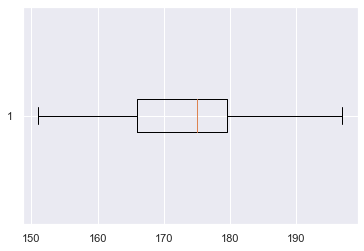

In [95]:
plt.boxplot(values, vert=False)    #simple way to create a boxplot
plt.show()
median_height= values.median()

#### boxplot is not symmteric so replace NaN with median

In [96]:
df_Height=df
df_Height['Height']=df['Height'].fillna(175)
df_Height

<ipython-input-96-6502d42031aa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Height['Height']=df['Height'].fillna(175)


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,175.0,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,175.0,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


## filling missing values for weigth

In [97]:
values=sampledf1['Weight'].dropna()
values.describe()


count     39.000000
mean      68.538462
std       13.865607
min       40.000000
25%       58.500000
50%       66.000000
75%       77.000000
max      100.000000
Name: Weight, dtype: float64

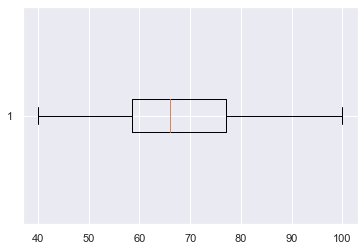

In [98]:
plt.boxplot(values, vert=False)    #simple way to create a boxplot
plt.show()
mean_weight = values.mean()

### we see that the data is symmetric so, we replace with mean

In [110]:
df_Height_Weight=df_Height
df_Height_Weight['Weight']=df_Height['Weight'].fillna(68.538462)
df_Height_Weight


<ipython-input-110-cc020d5dee2f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Height_Weight['Weight']=df_Height['Weight'].fillna(68.538462)


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.000000,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.000000,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,175.0,68.538462,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,175.0,68.538462,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.000000,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.000000,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.000000,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.000000,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.000000,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


### filling in missing values for age

In [111]:
values=sampledf1['Age'].dropna()
values.describe()

count    47.000000
mean     25.680851
std       7.144796
min      15.000000
25%      21.000000
50%      25.000000
75%      29.000000
max      57.000000
Name: Age, dtype: float64

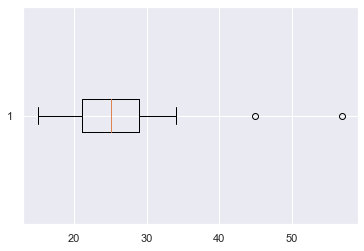

In [112]:
plt.boxplot(values, vert=False)    #simple way to create a boxplot
plt.show()

### Not symmteric and has outliers, so we replace with median

In [113]:
df_Height_Weight_Age=df_Height_Weight
df_Height_Weight_Age['Age']=df_Height['Age'].fillna(25)
df_Height_Weight_Age

<ipython-input-113-329a93c015fa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Height_Weight_Age['Age']=df_Height['Age'].fillna(25)


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.000000,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.000000,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,175.0,68.538462,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,175.0,68.538462,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.000000,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.000000,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.000000,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.000000,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.000000,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [116]:
df_Height_Weight_Age.isnull().sum()


ID             0
Name           0
Sex            0
Age            0
Height         0
Weight         0
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     229959
dtype: int64

In [118]:
df=df_Height_Weight_Age
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.000000,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.000000,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,175.0,68.538462,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,175.0,68.538462,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.000000,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.000000,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.000000,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.000000,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.000000,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


### successfully handled Null or missing values for all columns

## 3) Graph vizualization

### Grouping the dataset based on sex

In [120]:
g_df=df.groupby('Sex')
g_df

In [121]:
for gender,gender_df in g_df:
    print(gender)
    print(gender_df)

F
            ID                                 Name Sex   Age  Height  Weight  \
4            5             Christine Jacoba Aaftink   F  21.0   185.0    82.0   
5            5             Christine Jacoba Aaftink   F  21.0   185.0    82.0   
6            5             Christine Jacoba Aaftink   F  25.0   185.0    82.0   
7            5             Christine Jacoba Aaftink   F  25.0   185.0    82.0   
8            5             Christine Jacoba Aaftink   F  27.0   185.0    82.0   
...        ...                                  ...  ..   ...     ...     ...   
271080  135553  Galina Ivanovna Zybina (-Fyodorova)   F  33.0   168.0    80.0   
271099  135560                    Stavroula Zygouri   F  36.0   171.0    63.0   
271102  135563            Olesya Nikolayevna Zykina   F  19.0   171.0    64.0   
271103  135563            Olesya Nikolayevna Zykina   F  23.0   171.0    64.0   
271110  135568               Olga Igorevna Zyuzkova   F  33.0   171.0    69.0   

                Team  NOC

In [123]:
female,male = g_df
female_df = female[1]
male_df=male[1]
female_df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271080,135553,Galina Ivanovna Zybina (-Fyodorova),F,33.0,168.0,80.0,Soviet Union,URS,1964 Summer,1964,Summer,Tokyo,Athletics,Athletics Women's Shot Put,Bronze
271099,135560,Stavroula Zygouri,F,36.0,171.0,63.0,Greece,GRE,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Women's Middleweight, Freestyle",NaN
271102,135563,Olesya Nikolayevna Zykina,F,19.0,171.0,64.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Women's 4 x 400 metres Relay,Bronze
271103,135563,Olesya Nikolayevna Zykina,F,23.0,171.0,64.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Athletics,Athletics Women's 4 x 400 metres Relay,Silver


### No. of events held for Women vs Men Over the years

In [124]:
events_female={}
events_male={}

for year in female_df['Year']:
    if year not in events_female:
        no_events=female_df['Event'][female_df['Year']==year]
        evntlst=[]
        for event in no_events:
            if event not in evntlst:
                evntlst.append(event)
        events_female[year]=len(evntlst)

        
No_of_events_Female=sorted(events_female.items())

No_of_events_Female

[(1900, 8),
 (1904, 3),
 (1906, 2),
 (1908, 7),
 (1912, 7),
 (1920, 12),
 (1924, 19),
 (1928, 23),
 (1932, 22),
 (1936, 27),
 (1948, 39),
 (1952, 36),
 (1956, 37),
 (1960, 44),
 (1964, 53),
 (1968, 60),
 (1972, 65),
 (1976, 74),
 (1980, 73),
 (1984, 86),
 (1988, 99),
 (1992, 121),
 (1994, 27),
 (1996, 105),
 (1998, 31),
 (2000, 128),
 (2002, 36),
 (2004, 132),
 (2006, 39),
 (2008, 135),
 (2010, 40),
 (2012, 140),
 (2014, 48),
 (2016, 145)]

In [33]:
        
for year in male_df['Year']:
    if year not in events_male:
        no_events=male_df['Event'][male_df['Year']==year]
        evntlst=[]
        for event in no_events:
            if event not in evntlst:
                evntlst.append(event)
        events_male[year]=len(evntlst)
No_of_events_Male=sorted(events_male.items())

No_of_events_Male

[(1896, 43),
 (1900, 88),
 (1904, 92),
 (1906, 73),
 (1908, 105),
 (1912, 102),
 (1920, 150),
 (1924, 137),
 (1928, 121),
 (1932, 130),
 (1936, 150),
 (1948, 151),
 (1952, 141),
 (1956, 143),
 (1960, 138),
 (1964, 152),
 (1968, 156),
 (1972, 173),
 (1976, 174),
 (1980, 179),
 (1984, 185),
 (1988, 195),
 (1992, 205),
 (1994, 36),
 (1996, 174),
 (1998, 39),
 (2000, 180),
 (2002, 44),
 (2004, 176),
 (2006, 47),
 (2008, 175),
 (2010, 48),
 (2012, 170),
 (2014, 55),
 (2016, 170)]

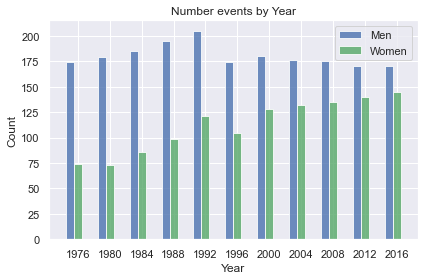

In [125]:
#Summer olympics(1976 - 2016)
years = [1976,1980,1984,1988,1992,1996,2000,2004,2008,2012,2016]
x=[1,2,3,4,5,6,7,8,9,10,11]
men = []
women = []
labels = ['1976','1980','1984','1988','1992','1996','2000','2004','2008','2012','2016']

for year in years:
    for i in No_of_events_Male:
        eyear,nevent=i
        if year==eyear:
            men.append(nevent)
            
for year in years:
    for i in No_of_events_Female:
        eyear,nevent=i
        if year==eyear:
            women.append(nevent)
    
    
    
# create plot
fig, ax = plt.subplots()
index = np.arange(len(x))
bar_width = 0.25
opacity = 0.8

rects1 = plt.bar(index,men, bar_width,
alpha=opacity,
color='b',
label='Men')

rects2 = plt.bar(index + bar_width, women, bar_width,
alpha=opacity,
color='g',
label='Women')

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Number events by Year')
plt.xticks(index + bar_width, labels)
plt.legend()

plt.tight_layout()
plt.show()

#### Here we can conclude that number of events held for men is more compared to females , but over the years events held for females have increased 

### Country-wise no. of female participants (over the history of olympics)

In [126]:
no_of_participants={}

for NOC in female_df["NOC"]:
    if NOC not in no_of_participants:
        no_of_participants[NOC]=0
    no_of_participants[NOC]+=1
    
no_of_participants


{'NED': 1923,
 'FIN': 992,
 'NOR': 1130,
 'ROU': 1619,
 'EST': 221,
 'AZE': 71,
 'RUS': 2189,
 'ESP': 1439,
 'ARG': 643,
 'URS': 1590,
 'GRE': 655,
 'IRI': 49,
 'ITA': 2539,
 'IRL': 282,
 'CAN': 3563,
 'USA': 5489,
 'MAR': 92,
 'EGY': 181,
 'JOR': 23,
 'ALG': 94,
 'CMR': 94,
 'BRU': 2,
 'BRN': 31,
 'IRQ': 7,
 'INA': 136,
 'SGP': 129,
 'JPN': 2779,
 'CGO': 35,
 'GDR': 931,
 'GER': 2994,
 'CUB': 588,
 'ISR': 207,
 'SWE': 1977,
 'ISV': 57,
 'RSA': 427,
 'SUI': 1204,
 'TUR': 251,
 'SRI': 44,
 'KAZ': 549,
 'KEN': 159,
 'FRA': 2761,
 'NGR': 309,
 'BRA': 1148,
 'LAT': 197,
 'CHI': 118,
 'IND': 241,
 'POL': 1745,
 'BLR': 794,
 'GEO': 72,
 'GUY': 21,
 'BUL': 1069,
 'COL': 295,
 'FRG': 912,
 'PLE': 8,
 'SOM': 5,
 'KSA': 5,
 'URU': 62,
 'MEX': 649,
 'GHA': 58,
 'UGA': 42,
 'VEN': 221,
 'HUN': 1748,
 'TCH': 903,
 'CZE': 696,
 'NIG': 10,
 'GBR': 3263,
 'AUS': 2749,
 'NZL': 784,
 'PHI': 104,
 'BEL': 586,
 'SUR': 22,
 'ETH': 92,
 'MGL': 149,
 'AUT': 1100,
 'NAM': 28,
 'ASA': 7,
 'TOG': 11,
 'SAM': 12

In [127]:
female_participants = sorted(no_of_participants.items(),key=lambda x:x[1])
female_participants

[('MAL', 1),
 ('SSD', 1),
 ('RHO', 1),
 ('BRU', 2),
 ('ANZ', 2),
 ('TUV', 2),
 ('VNM', 2),
 ('NRU', 2),
 ('BOH', 2),
 ('KIR', 3),
 ('OMA', 4),
 ('KUW', 4),
 ('YEM', 4),
 ('SOM', 5),
 ('KSA', 5),
 ('DJI', 5),
 ('TLS', 5),
 ('MTN', 5),
 ('ROT', 5),
 ('KOS', 5),
 ('IVB', 5),
 ('AFG', 5),
 ('STP', 6),
 ('ERI', 6),
 ('IRQ', 7),
 ('ASA', 7),
 ('DMA', 7),
 ('UAE', 7),
 ('QAT', 7),
 ('SAA', 7),
 ('BOT', 7),
 ('MHL', 7),
 ('PLE', 8),
 ('COM', 8),
 ('GBS', 8),
 ('SWZ', 8),
 ('CPV', 9),
 ('SOL', 9),
 ('BIZ', 9),
 ('NIG', 10),
 ('SUD', 10),
 ('CHA', 10),
 ('TGA', 10),
 ('TOG', 11),
 ('PAK', 11),
 ('VIN', 11),
 ('LBA', 11),
 ('GEQ', 11),
 ('FSM', 11),
 ('SAM', 12),
 ('MDV', 12),
 ('VAN', 12),
 ('CAY', 12),
 ('AHO', 12),
 ('LAO', 12),
 ('BAN', 13),
 ('PLW', 13),
 ('LCA', 13),
 ('GAM', 13),
 ('LBR', 13),
 ('BEN', 14),
 ('MAW', 14),
 ('BDI', 14),
 ('GUI', 15),
 ('GAB', 15),
 ('LES', 15),
 ('BUR', 15),
 ('CAF', 16),
 ('COK', 16),
 ('TJK', 16),
 ('ARU', 16),
 ('SYR', 17),
 ('GRN', 17),
 ('SKN', 17),
 ('

In [128]:
Female_participants_df = pd.DataFrame(female_participants,columns=["NOC","Count"])
Female_participants_df

,NOC,Count
0,MAL,1
1,SSD,1
2,RHO,1
3,BRU,2
4,ANZ,2
...,...,...
217,JPN,2779
218,GER,2994
219,GBR,3263
220,CAN,3563


### Top 5 Countries with highest no. of participants

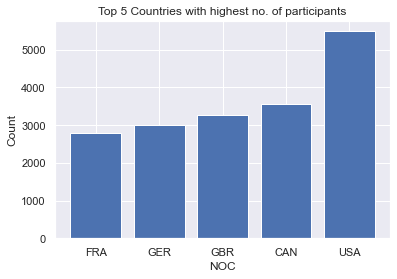

In [129]:
top_df=Female_participants_df.tail()

x = [1, 2, 3, 4, 5]
labels = ['FRA', 'GER', 'GBR', 'CAN','USA']
y = np.arange(0.2, 100)
plt.bar(x, top_df['Count'], align='center')
plt.xticks(x, labels)    #optional to set the class names for the bars
#plt.yticks(x, y)     #optional to set the values of y axis
plt.xlabel('NOC')
plt.ylabel('Count')
plt.title('Top 5 Countries with highest no. of participants')
plt.show()


### Analysing No. of medals won by USA(using Histogram) with Age/Height/weight as parameter,we took USA only for simplicity as they have most participants
    

In [130]:
female_df_Medals=female_df[female_df["NOC"]=='USA' ]
female_df_Medals

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
282,149,Mara Katherine Abbott,F,30.0,163.0,52.000000,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Cycling,"Cycling Women's Road Race, Individual",NaN
283,150,Margaret Ives Abbott (-Dunne),F,23.0,175.0,68.538462,United States,USA,1900 Summer,1900,Summer,Paris,Golf,Golf Women's Individual,Gold
284,151,Mary Perkins Ives Abbott (Perkins-),F,42.0,175.0,68.538462,United States,USA,1900 Summer,1900,Summer,Paris,Golf,Golf Women's Individual,NaN
286,153,Monica Cecilia Abbott,F,23.0,191.0,88.000000,United States,USA,2008 Summer,2008,Summer,Beijing,Softball,Softball Women's Softball,Silver
311,165,Nia Nicole Abdallah,F,20.0,175.0,56.000000,United States,USA,2004 Summer,2004,Summer,Athina,Taekwondo,Taekwondo Women's Featherweight,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270220,135184,"Jacqueline Jean ""Jackie"" Zoch",F,27.0,180.0,76.000000,United States,USA,1976 Summer,1976,Summer,Montreal,Rowing,Rowing Women's Coxed Eights,Bronze
270708,135381,Angela Zuckerman (-Davre),F,26.0,175.0,65.000000,United States,USA,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,500 metres",NaN
270709,135381,Angela Zuckerman (-Davre),F,26.0,175.0,65.000000,United States,USA,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 3,000 metres",NaN
270710,135381,Angela Zuckerman (-Davre),F,28.0,175.0,65.000000,United States,USA,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,500 metres",NaN


In [40]:
female_df_Medals=female_df_Medals.dropna()    # as now NaN means they didn't win a medal
female_df_Medals

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
283,150,Margaret Ives Abbott (-Dunne),F,23.0,178.0,71.666667,United States,USA,1900 Summer,1900,Summer,Paris,Golf,Golf Women's Individual,Gold
286,153,Monica Cecilia Abbott,F,23.0,191.0,88.000000,United States,USA,2008 Summer,2008,Summer,Beijing,Softball,Softball Women's Softball,Silver
311,165,Nia Nicole Abdallah,F,20.0,175.0,56.000000,United States,USA,2004 Summer,2004,Summer,Athina,Taekwondo,Taekwondo Women's Featherweight,Silver
1514,837,Rachael Alexis Adams,F,26.0,188.0,81.000000,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Volleyball,Volleyball Women's Volleyball,Bronze
2352,1313,Robyn Mokihana Ah Mow-Santos,F,32.0,172.0,67.000000,United States,USA,2008 Summer,2008,Summer,Beijing,Volleyball,Volleyball Women's Volleyball,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269641,134928,"Nicole ""Nikki"" Ziegelmeyer (-Brown, -Meyer)",F,16.0,173.0,61.000000,United States,USA,1992 Winter,1992,Winter,Albertville,Short Track Speed Skating,"Short Track Speed Skating Women's 3,000 metres...",Silver
269642,134928,"Nicole ""Nikki"" Ziegelmeyer (-Brown, -Meyer)",F,18.0,173.0,61.000000,United States,USA,1994 Winter,1994,Winter,Lillehammer,Short Track Speed Skating,"Short Track Speed Skating Women's 3,000 metres...",Bronze
269854,135017,Suzanne Winona Zimmerman (-Edwards),F,23.0,178.0,71.666667,United States,USA,1948 Summer,1948,Summer,London,Swimming,Swimming Women's 100 metres Backstroke,Silver
270182,135165,"Kimberley Lyn ""Kim"" Zmeskal (-Burdette)",F,16.0,139.0,36.000000,United States,USA,1992 Summer,1992,Summer,Barcelona,Gymnastics,Gymnastics Women's Team All-Around,Bronze


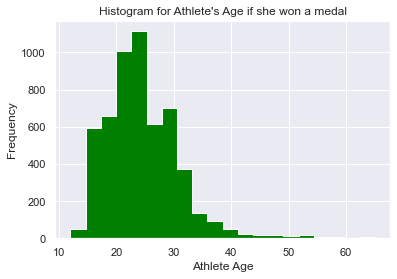

In [131]:
bin_heights, bins, patches = plt.hist(female_df_Medals['Age'], color='green', histtype = 'stepfilled',bins=20)

plt.xlabel('Athlete Age')
plt.ylabel('Frequency')
plt.title("Histogram for Athlete's Age if she won a medal")
plt.show()




### Conclusion : we see that the histogram is Right skewed, indicating most winning athletes are quites young

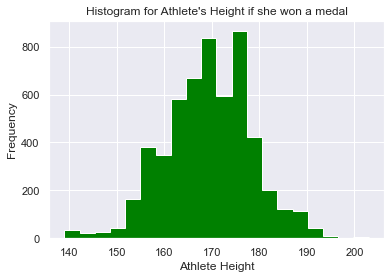

In [132]:
bin_heights, bins, patches = plt.hist(female_df_Medals['Height'], color='green', histtype = 'stepfilled',bins=20)

plt.xlabel('Athlete Height')
plt.ylabel('Frequency')
plt.title("Histogram for Athlete's Height if she won a medal")
plt.show()

#### Conclusion: we see that the histogram is symmetric , and ideal Height for winning would be somewhere around 165-180 (irrespective of the sport) ,we can use the same technique to identify Distributions for Height/Weight/Age for winners taking Sport of choice as  the Dataframe and use it as a Metric when choosing team/etc

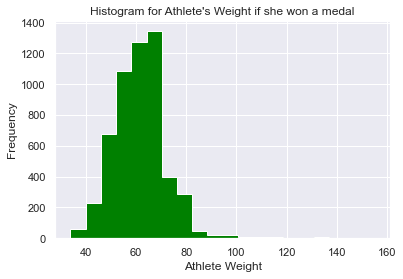

In [133]:
bin_heights, bins, patches = plt.hist(female_df_Medals['Weight'], color='green', histtype = 'stepfilled',bins=20)

plt.xlabel('Athlete Weight')
plt.ylabel('Frequency')
plt.title("Histogram for Athlete's Weight if she won a medal")
plt.show()

### Again we will use the dataframe for USA as they have most number women participation as of date

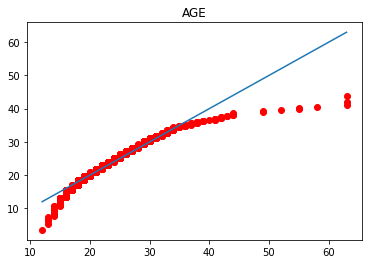

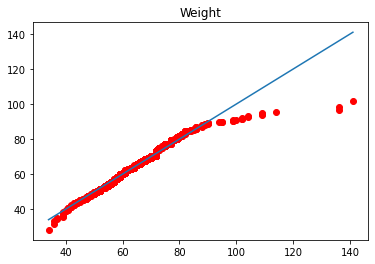

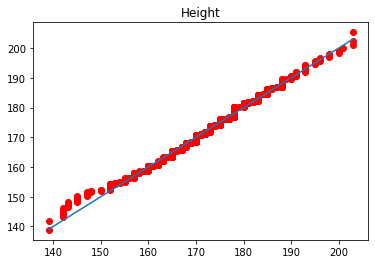

In [45]:
from scipy.stats import zscore
from scipy.stats import norm

def npp1(data):
    p =[]
    t =[]
    data = np.sort(np.array(data))
    p = [(i - 0.5)/len(data) for i in range(1, len(data)+1)]
    t = [norm.ppf(i, np.mean(data), np.std(data)) for i in p]
    plt.plot(data, t, 'ro', data, data)
    

    
npp1(female_df_Medals['Age'])
plt.title("AGE")
plt.show()

npp1(female_df_Medals['Weight'])
plt.title("Weight")
plt.show()

npp1(female_df_Medals['Height'])
plt.title("Height")
plt.show()

#### “Normalizing” a vector most often means dividing by a norm of the vector. It also often refers to rescaling by the minimum and range of the vector, to make all the elements lie between 0 and 1 thus bringing all the values of numeric columns in the dataset to a common scale.

#### Here Height Column is the column that follows normal distribution to a greater degree than Age and weight

### Rescaling our dataset (Numericale variables- Age,Height,weight)

### i) Data Normalization

In [48]:
# Create a minimum and maximum processor object- MinMaxScaler
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
df1=df
x1 = df1[['Height']].values.astype(float)
x1_scaled = min_max_scaler.fit_transform(x1)
df_normalized1 = pd.DataFrame(x1_scaled)

x2 = df1[['Weight']].values.astype(float)
x2_scaled = min_max_scaler.fit_transform(x2)
df_normalized2 = pd.DataFrame(x2_scaled)


x3 = df1[['Age']].values.astype(float)
x3_scaled = min_max_scaler.fit_transform(x3)
df_normalized3 = pd.DataFrame(x3_scaled)

In [49]:
df_normalized1

,0
0,0.535354
1,0.434343
2,0.515152
3,0.515152
4,0.585859
...,...
269726,0.525253
269727,0.494949
269728,0.494949
269729,0.585859


In [50]:
df_normalized2

,0
0,0.291005
1,0.185185
2,0.246914
3,0.246914
4,0.301587
...,...
269726,0.338624
269727,0.179894
269728,0.179894
269729,0.375661


In [51]:
df_normalized3

,0
0,0.160920
1,0.149425
2,0.160920
3,0.275862
4,0.126437
...,...
269726,0.218391
269727,0.195402
269728,0.195402
269729,0.229885


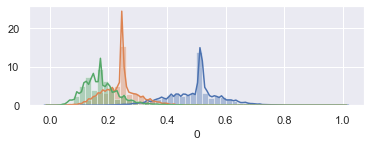

In [52]:
import seaborn as sns
sns.set()

plt.subplot(1, 1, 1)
ax = sns.distplot(df_normalized1[0])
#height

plt.subplot(1, 2, 1)
ax = sns.distplot(df_normalized2[0])
#weight

plt.subplot(1, 2, 2)
ax = sns.distplot(df_normalized3[0])

plt.subplot(2,1,1)
#sns.set(rc={"figure.figsize": (8, 6)})
ax = sns.distplot(df_normalized1[0])
ax = sns.distplot(df_normalized2[0])
ax = sns.distplot(df_normalized3[0])

In [53]:
####therefore the columns height,weight and age have been normalized

### ii) Data standardization 

In [147]:
from sklearn.preprocessing import StandardScaler
scaling = StandardScaler()
z=scaling.fit_transform(df[['Age','Height','Weight']])
z


array([[-0.23758573,  0.50900634,  0.77470076],
       [-0.40268235, -0.565991  , -0.80766375],
       [-0.23758573, -0.02849233, -0.13211579],
       ...,
       [ 0.25770414,  0.07900741, -0.88678198],
       [ 0.75299401,  1.04650501,  2.04059237],
       [ 1.4133805 ,  1.04650501,  2.04059237]])

In [148]:
x=preprocessing.scale(df.Height)
#print(x)
print(x.mean().round())
print(x.var())

-0.0
1.0


In [149]:
x=preprocessing.scale(df.Weight)
#print(x)
print(x.mean().round())
print(x.var())

0.0
1.0


In [150]:
x=preprocessing.scale(df.Age)
#print(x)
print(x.mean().round())
print(x.var())

-0.0
1.0000000000000002


# Correlation b/w the variables

In [139]:
df_corr=df.copy()

In [140]:
df_corr['Medal'].fillna(0,inplace=True)

In [141]:
df_corr

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.000000,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,0
1,2,A Lamusi,M,23.0,170.0,60.000000,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,0
2,3,Gunnar Nielsen Aaby,M,24.0,175.0,68.538462,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,0
3,4,Edgar Lindenau Aabye,M,34.0,175.0,68.538462,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.000000,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.000000,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,0
271112,135570,Piotr ya,M,27.0,176.0,59.000000,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",0
271113,135570,Piotr ya,M,27.0,176.0,59.000000,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",0
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.000000,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,0


In [66]:
df_corr['Medal'][df_corr['Medal']!=0]=1
df_corr

<ipython-input-66-ea0318f9a05b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['Medal'][df_corr['Medal']!=0]=1


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.000000,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,0
1,2,A Lamusi,M,23.0,170.0,60.000000,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,0
2,3,Gunnar Nielsen Aaby,M,24.0,178.0,71.666667,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,0
3,4,Edgar Lindenau Aabye,M,34.0,178.0,71.666667,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,1
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.000000,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.000000,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,0
271112,135570,Piotr ya,M,27.0,176.0,59.000000,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",0
271113,135570,Piotr ya,M,27.0,176.0,59.000000,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",0
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.000000,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,0


In [142]:
g_df_corr=df_corr.groupby('Sex')
g_df_corr

In [143]:
for i,j in g_df_corr:
    print(i,j)

F             ID                                 Name Sex   Age  Height  Weight  \
4            5             Christine Jacoba Aaftink   F  21.0   185.0    82.0   
5            5             Christine Jacoba Aaftink   F  21.0   185.0    82.0   
6            5             Christine Jacoba Aaftink   F  25.0   185.0    82.0   
7            5             Christine Jacoba Aaftink   F  25.0   185.0    82.0   
8            5             Christine Jacoba Aaftink   F  27.0   185.0    82.0   
...        ...                                  ...  ..   ...     ...     ...   
271080  135553  Galina Ivanovna Zybina (-Fyodorova)   F  33.0   168.0    80.0   
271099  135560                    Stavroula Zygouri   F  36.0   171.0    63.0   
271102  135563            Olesya Nikolayevna Zykina   F  19.0   171.0    64.0   
271103  135563            Olesya Nikolayevna Zykina   F  23.0   171.0    64.0   
271110  135568               Olga Igorevna Zyuzkova   F  33.0   171.0    69.0   

                Team  NOC

In [69]:
female,male = g_df_corr
female_df_corr = female[1]
male_df_corr=male[1]
female_df_corr

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,0
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",0
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,0
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",0
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271080,135553,Galina Ivanovna Zybina (-Fyodorova),F,33.0,168.0,80.0,Soviet Union,URS,1964 Summer,1964,Summer,Tokyo,Athletics,Athletics Women's Shot Put,1
271099,135560,Stavroula Zygouri,F,36.0,171.0,63.0,Greece,GRE,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Women's Middleweight, Freestyle",0
271102,135563,Olesya Nikolayevna Zykina,F,19.0,171.0,64.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Women's 4 x 400 metres Relay,1
271103,135563,Olesya Nikolayevna Zykina,F,23.0,171.0,64.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Athletics,Athletics Women's 4 x 400 metres Relay,1


### Now we have converted Medal column to a binomial distribution

In [71]:
import seaborn as sn
import matplotlib.pyplot as plt

female_df_winners = female_df_corr[female_df_corr["Medal"]==1]
female_df_winners = female_df_winners[["Age","Height","Weight","Medal"]]

female_df_winners

,Age,Height,Weight,Medal
79,27.0,163.0,71.666667,1
91,22.0,178.0,71.666667,1
105,23.0,182.0,64.000000,1
161,21.0,165.0,49.000000,1
163,22.0,179.0,80.000000,1
...,...,...,...,...
271076,21.0,168.0,80.000000,1
271078,25.0,168.0,80.000000,1
271080,33.0,168.0,80.000000,1
271102,19.0,171.0,64.000000,1


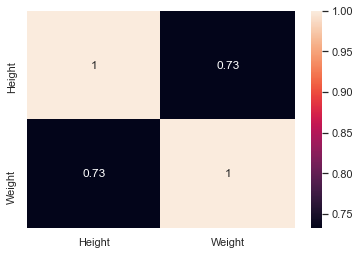

In [72]:
female_df_winners = female_df_winners[["Height","Weight"]]

import seaborn as sn
import matplotlib.pyplot as plt


corrMatrix = female_df_winners.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

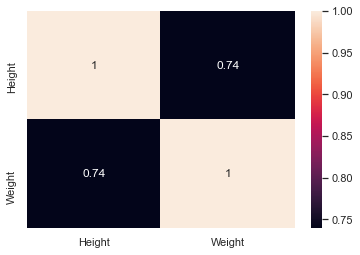

In [73]:
male_df_winners = male_df_corr[male_df_corr["Medal"]==1]
male_df_winners = male_df_winners[["Height","Weight"]]


corrMatrix = male_df_winners.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

### Conclusion : Height and Weight are positively related

## Hyposthesis testing

### Case Study:   Media reoprts
the Russian female team have prepared strong for upcoming olympic games
The mean age of the squad is just 21, 

they claim that as that average age of olympic medalists in every olmypics event over the years have been less than 23. So the Russians are the favourites

### So now we test this claim:
### Ho : u<=23
### Ha : u>23

### we will take a sample from our dataset of female_corr where the medal column is a binomial population

### from that sample we will only consider the women who won and find their Average age(which will be our statistic)

In [156]:
sample_h = female_df_corr.sample(500)
sample_h

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
266912,133542,"Daryna Oleksivna ""Dar'ia"" Yushko",F,31.0,174.0,59.0,Ukraine,UKR,2016 Summer,2016,Summer,Rio de Janeiro,Synchronized Swimming,Synchronized Swimming Women's Team,0
2298,1277,Carolina Aguirre Giraldo,F,20.0,160.0,59.0,Colombia,COL,2016 Summer,2016,Summer,Rio de Janeiro,Archery,Archery Women's Team,0
43091,22223,Eline Olga Coene,F,32.0,170.0,64.0,Netherlands,NED,1996 Summer,1996,Summer,Atlanta,Badminton,Badminton Women's Doubles,0
259414,129882,Eva Susanne Wetteskog (-Bungum),F,22.0,170.0,52.0,Sweden,SWE,1980 Summer,1980,Summer,Moskva,Diving,Diving Women's Springboard,0
213363,107146,Ingrid Ulrike Schmidt (-Koppers),F,31.0,179.0,69.0,Germany-2,GER,2000 Summer,2000,Summer,Sydney,Beach Volleyball,Beach Volleyball Women's Beach Volleyball,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258308,129345,Dborah Weil (-Coldwell-),F,18.0,160.0,50.0,Mexico,MEX,1976 Summer,1976,Summer,Montreal,Diving,Diving Women's Platform,0
153965,77295,Doreen Ann McCannell (-Botterill),F,20.0,167.0,58.0,Canada,CAN,1968 Winter,1968,Winter,Grenoble,Speed Skating,"Speed Skating Women's 3,000 metres",0
3127,1743,Yelizaveta Vyacheslavovna Aksyonova,F,18.0,168.0,60.0,Kazakhstan,KAZ,2014 Winter,2014,Winter,Sochi,Luge,Luge Women's Singles,0
21111,11146,Jamie Lynn Beyerle-Gray (-Corkish),F,24.0,157.0,55.0,United States,USA,2008 Summer,2008,Summer,Beijing,Shooting,"Shooting Women's Small-Bore Rifle, Three Posit...",0


In [157]:
### now we take only the women who won from this sample
sample_h = sample_h[sample_h['Medal']==1]
sample_h

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
207296,104019,Gabriela Beatriz Sabatini,F,18.0,175.0,64.000000,Argentina,ARG,1988 Summer,1988,Summer,Seoul,Tennis,Tennis Women's Singles,1
17269,9231,Stephanie Beckert,F,21.0,172.0,73.000000,Germany,GER,2010 Winter,2010,Winter,Vancouver,Speed Skating,"Speed Skating Women's 3,000 metres",1
86829,44045,Ilona Maria Gusenbauer (Majdan-),F,24.0,181.0,67.000000,Austria,AUT,1972 Summer,1972,Summer,Munich,Athletics,Athletics Women's High Jump,1
48337,24921,Sylvie Daigle,F,31.0,168.0,61.000000,Canada,CAN,1994 Winter,1994,Winter,Lillehammer,Short Track Speed Skating,"Short Track Speed Skating Women's 3,000 metres...",1
115238,58392,Maddison Keeney,F,20.0,167.0,62.000000,Australia,AUS,2016 Summer,2016,Summer,Rio de Janeiro,Diving,Diving Women's Synchronized Springboard,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79024,40129,Luigina Giavotti,F,11.0,178.0,71.666667,Italy,ITA,1928 Summer,1928,Summer,Amsterdam,Gymnastics,Gymnastics Women's Team All-Around,1
25331,13251,Charlotte Bonnet,F,17.0,175.0,64.000000,France,FRA,2012 Summer,2012,Summer,London,Swimming,Swimming Women's 4 x 200 metres Freestyle Relay,1
153055,76811,Gisela Mauermayer,F,22.0,172.0,70.000000,Germany,GER,1936 Summer,1936,Summer,Berlin,Athletics,Athletics Women's Discus Throw,1
213217,107063,"Jennifer Lynn ""Jenny"" Schmidgall-Potter",F,31.0,163.0,66.000000,United States,USA,2010 Winter,2010,Winter,Vancouver,Ice Hockey,Ice Hockey Women's Ice Hockey,1


In [158]:
sample_h['Age'].describe()

count    75.000000
mean     24.333333
std       6.016494
min      11.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      42.000000
Name: Age, dtype: float64

In [159]:
import math as m

x_bar = 24.333
s = 6.0164
n=75

u0=23

z = (x_bar - u0)/(s / m.sqrt(n))
z

1.9187751200795415

In [ ]:
### Let us assume 5% significance rule

In [ ]:
### z_critical = z(aplha = 0.05)
z_critical = 1.65

## from table
p_value = .0281   # 1- p(z<1.918) # 1- 0.9719

### As p-value <= alpha(0.05)

### we reject Ho, that is Ho is false and claim  that we have a evidence against Ho(u<=23) for female participants
### hence u>23